# Análise de sentimentos do Twitter com dados extraidor do dataset anotado tweetSentBR

O trabalho será realizando apenas com os dados balanaceados (oversampling)

### Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carregando os dados para treinamento do modelo

In [2]:
# carregando dataset
tweets_df = pd.read_csv('')

In [3]:
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,que coisa linda O programa estava mostrando um...,False
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,1,test,por mais com as irmãs galvão adorei elas,False
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,1,test,mr CATRA USERNAME lançando sua nova música PPK...,False
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,0,test,quem viu aquela lutadora modela barbuda tatuad...,False
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,-1,test,tô passada com esse cara quanta merda pode sai...,False


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15047 entries, 0 to 15046
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         15047 non-null  int64 
 1   hashtag    15047 non-null  object
 2   votes      15047 non-null  object
 3   hard       15047 non-null  int64 
 4   sentiment  15047 non-null  object
 5   group      15047 non-null  object
 6   text       15047 non-null  object
 7   repeat     15047 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 837.7+ KB


In [5]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
-,47,47,47,47,47,47,47
-1,4426,4426,4426,4426,4426,4426,4426
0,3926,3926,3926,3926,3926,3926,3926
1,6648,6648,6648,6648,6648,6648,6648


Como podemos observar, os dados estão desbalanceados e com algumas linhas apresentando a variável sentimento com o caracter traço '-'.

Para melhor trabalharmos com os dados, foi decidida a remoção dessas linhas.

In [6]:
# removendo as linhas com a variável sentimento como traço '-'

indexNames = tweets_df[ tweets_df['sentiment'] == '-' ].index #obtendo o valor para ajudar a remover a linha
tweets_df.drop(indexNames , inplace=True) #removendo a linha correspondente ao valor informado

In [7]:
# tranformando valores para adequar a os classificadores
tweets_df['sentiment'] = tweets_df['sentiment'].replace(['-1', '0', '1'], [3, 6, 9])
tweets_df['sentiment'] = tweets_df['sentiment'].replace([3, 6, 9], [0, 1, 2])

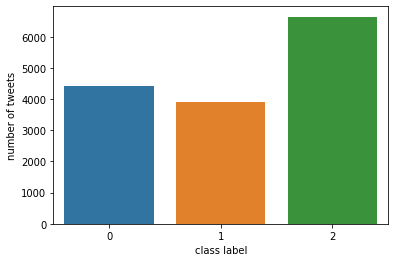

In [8]:
# Visualizando os dados graficamente
sns.countplot(x=tweets_df.sentiment)
plt.xlabel('class label')
plt.ylabel('number of tweets')
plt.show()

In [9]:
tweets_df.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat
sentiment,,,,,,,
0,4426,4426,4426,4426,4426,4426,4426
1,3926,3926,3926,3926,3926,3926,3926
2,6648,6648,6648,6648,6648,6648,6648


## Efetuando a limpeza dos dados

In [10]:
# removendo as palavras USERNAME e NUMBER
tweets_df['text_clean'] = tweets_df['text'].str.replace('USERNAME', '').str.replace('NUMBER', '')

In [11]:
!python -m nltk.downloader stopwords

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
# importando a biblioteca de processamento de linguagen natural e a de expreções regulares (regex)
import nltk
import re

# usando as funções stopword e remover os caracteres indesejados
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower() # remove url e tranforma o texto em minusculo
    instancia = re.sub(r'[0-9]+', '', instancia) # remove números
    instancia = re.sub(r'[^\w\s]','', instancia) # remove pontuação
    instancia = re.sub('[!#$%^&*()]', '', instancia) #remove caractéres espaciais
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [13]:
# remover emojis utilizado regex (re)
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [14]:
# aplicando a função de limpeza de dados:
tweets_df['text_clean'] = [Preprocessing(i) for i in tweets_df['text_clean']]
tweets_df['text_clean'] = [remove_emoji(i) for i in tweets_df['text_clean']]
pd.set_option('display.max_colwidth', None) 

tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos


# Lematização

In [15]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-07-13 17:57:02.013203: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 29.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [16]:
import spacy
nlp = spacy.load('pt_core_news_sm')

In [17]:
tweets_df['text_lemma'] = tweets_df['text_clean'].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))

In [18]:
tweets_df['text_lemma'] = [Preprocessing(i) for i in tweets_df['text_lemma']]
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,text_lemma
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,coisa lindo programa mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,irmã galvão ador
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,ver lutadora modelar barbuda tatuar masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,tô passado cara quanto merdo poder sair boca alguém algum minuto


## Lematização (outra forma)

In [19]:
!pip install simplemma

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import simplemma
from simplemma import text_lemmatizer

In [21]:
# teste
teste_lemma = text_lemmatizer('Sou o intervalo entre o que desejo ser e os outros me fizeram.', lang='pt')
teste_lemma

['ser',
 'o',
 'intervalo',
 'entre',
 'o',
 'que',
 'desejo',
 'ser',
 'e',
 'o',
 'outro',
 'me',
 'fazer',
 '.']

In [22]:
tweets_df['text_lemma_2'] = [text_lemmatizer(linha, lang='pt') for linha in tweets_df['text_clean']] #lematizando o texto
tweets_df['text_lemma_2'] = [' '.join(palavra) for palavra in tweets_df['text_lemma_2']] #juntando o texto novamente
tweets_df.head()

,id,hashtag,votes,hard,sentiment,group,text,repeat,text_clean,text_lemma,text_lemma_2
0,863044774588272640,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,que coisa linda O programa estava mostrando uma familia que adotou um adolescente de NUMBER anos que amor !,False,coisa linda programa mostrando familia adotou adolescente anos amor,coisa lindo programa mostrar familia adotar adolescente ano amor,coisar lindar programar mostrar familia adotar adolescente ano amor
1,865583716088766464,#encontro,"[1, 1, 1, 1, 1, 1, 1]",0,2,test,por mais com as irmãs galvão adorei elas,False,irmãs galvão adorei,irmã galvão ador,irmão galvão adorar
2,865063232201011200,#TheNoite,"[1, 0, 1, 1, 1, 0, 0]",2,2,test,mr CATRA USERNAME lançando sua nova música PPK CHORA no USERNAME k k k 👅 😉 #MrCatra #PpkChora,False,mr catra lançando nova música ppk chora k k k mrcatra ppkchora,mr catra lançar novo música ppk chorar k k k mrcatra ppkchora,mr catra lançar novo músico ppk chorar k k k mrcatra ppkchora
3,864668391008763904,#masterchefbr,"[0, 0, 0, 0, 0, 0, 0]",0,1,test,quem viu aquela lutadora modela barbuda tatuada #MasterChefBR,False,viu lutadora modela barbuda tatuada masterchefbr,ver lutadora modelar barbuda tatuar masterchefbr,ver lutador modelar barbudo tatuado masterchefbr
4,865572794016378880,#encontro,"[-1, -1, -1, -1, -1, -1, -1]",0,0,test,tô passada com esse cara quanta merda pode sair da boca de alguém em alguns minutos 😠,False,tô passada cara quanta merda pode sair boca alguém alguns minutos,tô passado cara quanto merdo poder sair boca alguém algum minuto,tô passado caro quanto merda poder sair bocar alguém algum minuto


## Trabalhando no equilibrio dos dados

### Iniciando o trabalho de balanceamento dos dados

In [23]:
minoria = tweets_df.loc[tweets_df['sentiment'] == 0]
meio = tweets_df.loc[tweets_df['sentiment'] == 1]
maioria = tweets_df.loc[tweets_df['sentiment'] == 2]

In [24]:
print('Maioria \n{}\n'.format(maioria['sentiment'].count()))
print('Meio \n{}\n'.format(meio['sentiment'].count()))
print('Minoria \n{}'.format(minoria['sentiment'].count()))

Maioria 
6648

Meio 
3926

Minoria 
4426


## Igualar a quantidade de tweets entre positivo, negativo e neutro

#### Oversampling (Criando datasets reorganizados para maioria)

In [25]:
from sklearn.utils import resample

menor_maior = resample(minoria, replace=True, n_samples=len(maioria), random_state=123)
meio_maior = resample(meio, replace=True, n_samples=len(maioria), random_state=123)

In [26]:
print(menor_maior.count(), meio_maior.count(), maioria.count())

id              6648
hashtag         6648
votes           6648
hard            6648
sentiment       6648
group           6648
text            6648
repeat          6648
text_clean      6648
text_lemma      6648
text_lemma_2    6648
dtype: int64 id              6648
hashtag         6648
votes           6648
hard            6648
sentiment       6648
group           6648
text            6648
repeat          6648
text_clean      6648
text_lemma      6648
text_lemma_2    6648
dtype: int64 id              6648
hashtag         6648
votes           6648
hard            6648
sentiment       6648
group           6648
text            6648
repeat          6648
text_clean      6648
text_lemma      6648
text_lemma_2    6648
dtype: int64


In [27]:
# juntando os dataframes
tweets_df_equilibrado_maior = pd.concat([menor_maior, meio_maior, maioria])

# resetando o index
tweets_df_equilibrado_maior = tweets_df_equilibrado_maior.reset_index()

# removendo as colunas Unnamed: 0 e index
tweets_df_equilibrado_maior.drop(columns=['index'], inplace=True)

In [28]:
tweets_df_equilibrado_maior.groupby(['sentiment']).count()

,id,hashtag,votes,hard,group,text,repeat,text_clean,text_lemma,text_lemma_2
sentiment,,,,,,,,,,
0,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648
1,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648
2,6648,6648,6648,6648,6648,6648,6648,6648,6648,6648


# Machine Learning - Utils

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Vetorizadores
from sklearn.feature_extraction.text import CountVectorizer

# Classificadores
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_predict

In [30]:
# Tokenização especial para tweets
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()

In [31]:
# função para escolher os pipelines dos modelos a serem treinados
def escolher_pipeline(pipe):
    
    if(pipe == 1):
        modelo_sgd_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SGDClassifier(alpha=0.0001,
                                     loss='modified_huber', 
                                     penalty ='l2'))
        ])
        return modelo_sgd_tfidf
    
    elif(pipe == 2):
        modelo_nb_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MultinomialNB(alpha=0.1))
        ])
        return modelo_nb_tfidf
    
    elif(pipe == 3):
        modelo_rf_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', RandomForestClassifier(n_estimators=10))
        ])
        return modelo_rf_tfidf
    
    elif(pipe == 4):
        modelo_knn_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', KNeighborsClassifier(metric='euclidean', 
                                            n_neighbors=1, 
                                            weights='uniform'))
        ])
        return modelo_knn_tfidf
    
    elif(pipe == 5):
        modelo_pa_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', PassiveAggressiveClassifier(C= 0.03, 
                                                   loss= 'squared_hinge'))
        ])
        return modelo_pa_tfidf
    
    elif(pipe == 6):
        modelo_gb_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', GradientBoostingClassifier(criterion='friedman_mse', 
                                                  learning_rate=0.2, 
                                                  max_depth=8, 
                                                  max_features='sqrt', 
                                                  n_estimators=10))
        ])
        return modelo_gb_tfidf
    
    elif(pipe == 7):
        modelo_xgb_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', xgb.XGBClassifier(learning_rate=0.5, 
                                         max_depth=4, 
                                         objective='binary=hinge'))
        ])
        return modelo_xgb_tfidf
    
    elif(pipe == 8):
        modelo_mlp_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', MLPClassifier(activation='relu', 
                                     alpha=0.05, 
                                     hidden_layer_sizes=(50, 100, 50), 
                                     learning_rate='constant', 
                                     solver='adam'))
        ])
        return modelo_mlp_tfidf
    
    elif(pipe == 9):
        modelo_lr_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', LogisticRegression(C= 100.0, 
                                          penalty= 'l2'))
        ])
        return modelo_lr_tfidf
    
    elif(pipe == 10):
        modelo_svc_tfidf = Pipeline([
            ('countVectorizer', CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)),
            ('modelo', SVC(C=10, 
                           gamma=1, 
                           kernel='rbf'))
        ])
        return modelo_svc_tfidf

In [32]:
!pip install confplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import confplot

# função que exibe a matrix de confusão para avalização do modelo
def matriz_confusao(y_test, modelo_predicao):
    
    # imprimir relatório de classificação
    print("Relatório de Classificação:\n", 
            metrics.classification_report(y_test, modelo_predicao))
    
    # imprimir a acurácia do modelo
    print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, modelo_predicao)))
    
    # imprimir a matrix de confusão
    print("Matrix de confusão:\n", pd.crosstab(y_test, modelo_predicao, 
                                                rownames=['Real'], 
                                                colnames=['Predito'], 
                                                margins=True),  '')
    
    # plotar a matrix de confusão
    cm = confusion_matrix(y_target = y_test, 
                            y_predicted = modelo_predicao, binary=False)
    fig, ax = plot_confusion_matrix(conf_mat = cm)
    plt.show()
    print('\n')
    
    # plotar a matrix de confusão (mais completo)
    y_true = y_test
    y_pred = modelo_predicao
    columns = ['negativo', 'neutro', 'positivo']
    confplot.plot_confusion_matrix_from_data(y_true, y_pred, columns)

# Machine Learning - Construindo modelo com dados oversampling

In [34]:
X = tweets_df_equilibrado_maior['text_lemma_2']
y = tweets_df_equilibrado_maior['sentiment']

In [35]:
X.shape, y.shape

((19944,), (19944,))

### Separando dados para o treino e para o teste

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((14958,), (14958,), (4986,), (4986,))

## Modelo 1 (CountVectorizer e SGDClassifier)

In [37]:
modelo1_orig = escolher_pipeline(1)
modelo1_orig = modelo1_orig.fit(X_train, y_train)
modelo1_pred_orig = modelo1_orig.predict(X_test)

In [38]:
modelo1_pred_orig

array([2, 1, 0, ..., 0, 0, 2])

### Avaliando o modelo 1

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1653
           1       0.74      0.81      0.77      1681
           2       0.79      0.69      0.73      1652

    accuracy                           0.78      4986
   macro avg       0.78      0.77      0.77      4986
weighted avg       0.78      0.78      0.77      4986

Acurácia: 0.7752

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1375   159   119  1653
1         136  1354   191  1681
2         192   324  1136  1652
All      1703  1837  1446  4986 


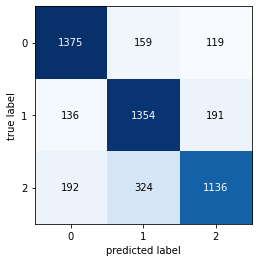

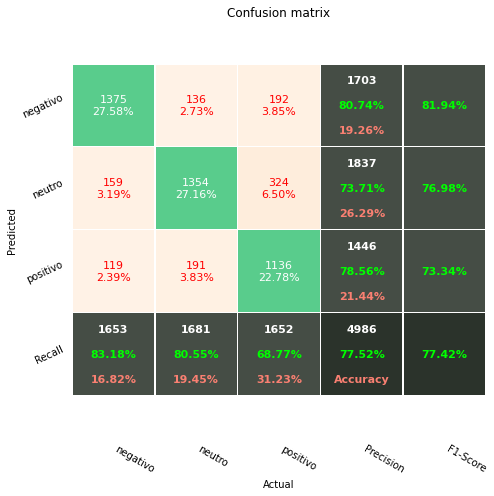

In [39]:
matriz_confusao(y_test, modelo1_pred_orig)

### Validação cruzada - modelo 1

In [40]:
validacao_cruzada1 = cross_val_predict(modelo1_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      6648
           1       0.74      0.81      0.77      6648
           2       0.80      0.70      0.75      6648

    accuracy                           0.78     19944
   macro avg       0.79      0.78      0.78     19944
weighted avg       0.79      0.78      0.78     19944

Acurácia: 0.7831

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5547   663   438   6648
1         508  5415   725   6648
2         740  1252  4656   6648
All      6795  7330  5819  19944 


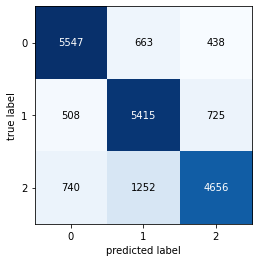

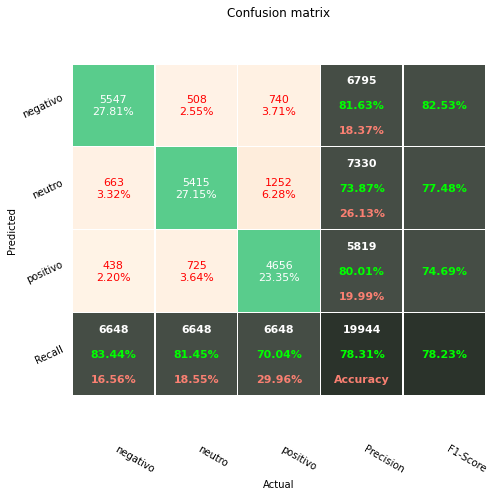

In [41]:
matriz_confusao(y, validacao_cruzada1)

## Modelo 2 (CountVectorizer e MultinomialNB)

In [42]:
modelo2_orig = escolher_pipeline(2)
modelo2_orig = modelo2_orig.fit(X_train, y_train)
modelo2_pred_orig = modelo2_orig.predict(X_test)

In [43]:
modelo2_pred_orig

array([2, 0, 1, ..., 0, 0, 2])

### Avaliando o modelo 2

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      1653
           1       0.72      0.66      0.69      1681
           2       0.72      0.70      0.71      1652

    accuracy                           0.72      4986
   macro avg       0.72      0.72      0.72      4986
weighted avg       0.72      0.72      0.72      4986

Acurácia: 0.7210

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1337   157   159  1653
1         288  1103   290  1681
2         235   262  1155  1652
All      1860  1522  1604  4986 


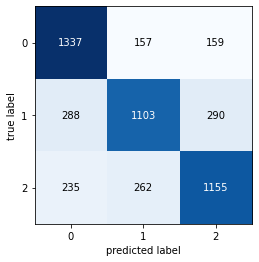

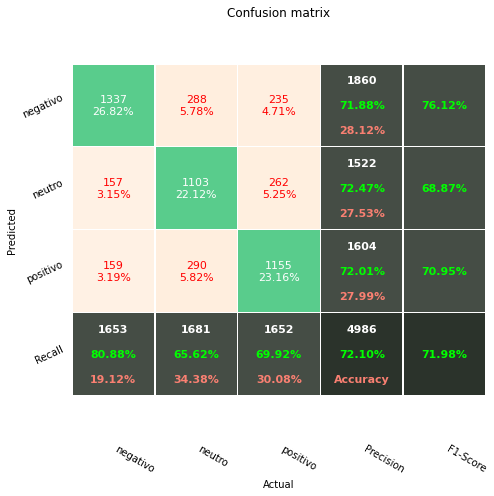

In [44]:
matriz_confusao(y_test, modelo2_pred_orig)

### Validação cruzada - modelo 2

In [45]:
validacao_cruzada2 = cross_val_predict(modelo2_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      6648
           1       0.73      0.67      0.70      6648
           2       0.74      0.70      0.72      6648

    accuracy                           0.73     19944
   macro avg       0.73      0.73      0.73     19944
weighted avg       0.73      0.73      0.73     19944

Acurácia: 0.7295

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5386   667   595   6648
1        1111  4477  1060   6648
2         949  1013  4686   6648
All      7446  6157  6341  19944 


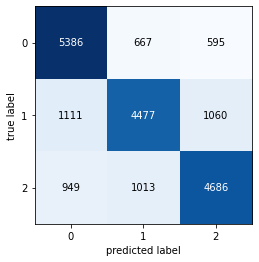

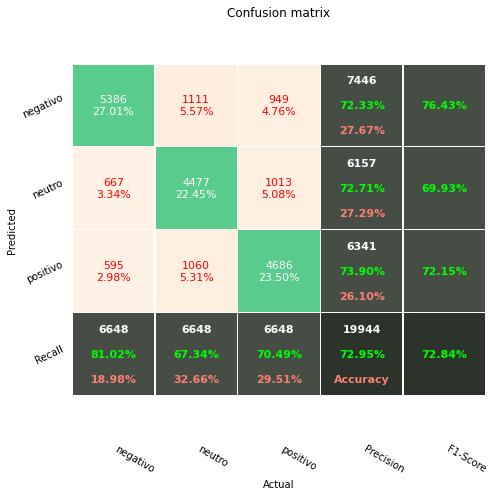

In [46]:
matriz_confusao(y, validacao_cruzada2)

## Modelo 3 (CountVectorizer e RandomForestClassifier)

In [47]:
modelo3_orig = escolher_pipeline(3)
modelo3_orig = modelo3_orig.fit(X_train, y_train)
modelo3_pred_orig = modelo3_orig.predict(X_test)

In [48]:
modelo3_pred_orig

array([2, 0, 2, ..., 1, 0, 2])

### Avaliando o modelo 3

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1653
           1       0.75      0.86      0.80      1681
           2       0.82      0.66      0.73      1652

    accuracy                           0.79      4986
   macro avg       0.80      0.79      0.79      4986
weighted avg       0.80      0.79      0.79      4986

Acurácia: 0.7916

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1422   131   100  1653
1         101  1442   138  1681
2         210   359  1083  1652
All      1733  1932  1321  4986 


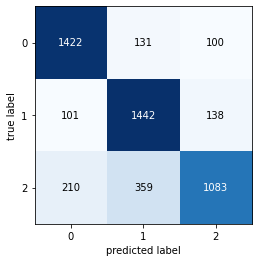

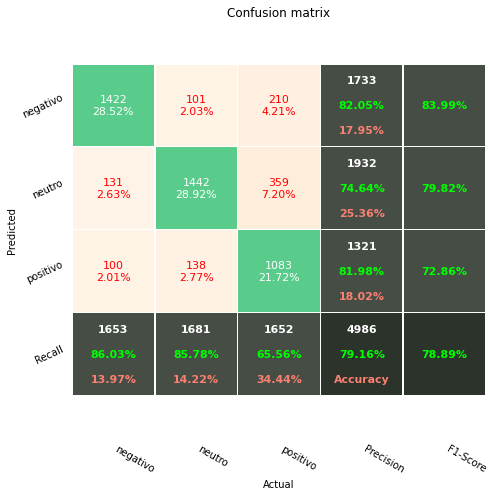

In [49]:
matriz_confusao(y_test, modelo3_pred_orig)

### Validação cruzada - modelo 3

In [50]:
validacao_cruzada3 = cross_val_predict(modelo3_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86      6648
           1       0.75      0.88      0.81      6648
           2       0.85      0.66      0.75      6648

    accuracy                           0.81     19944
   macro avg       0.81      0.81      0.80     19944
weighted avg       0.81      0.81      0.80     19944

Acurácia: 0.8074

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5816   489   343   6648
1         338  5872   438   6648
2         797  1437  4414   6648
All      6951  7798  5195  19944 


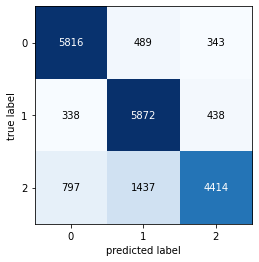

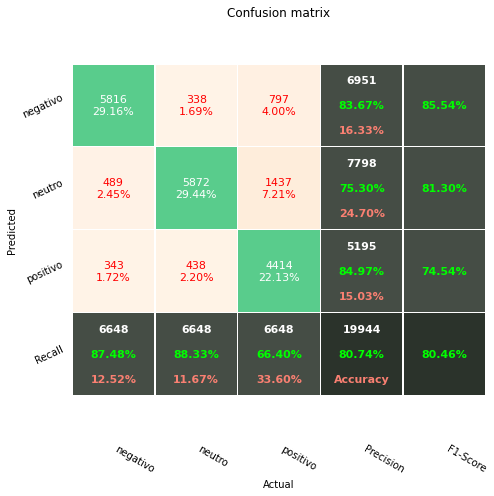

In [51]:
matriz_confusao(y, validacao_cruzada3)

## Modelo 4 (CountVectorizer e KNeighborsClassifier)

In [52]:
modelo4_orig = escolher_pipeline(4)
modelo4_orig = modelo4_orig.fit(X_train, y_train)
modelo4_pred_orig = modelo4_orig.predict(X_test)

In [53]:
modelo4_pred_orig

array([1, 1, 2, ..., 1, 0, 0])

### Avaliando o modelo 4

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1653
           1       0.62      0.90      0.73      1681
           2       0.76      0.52      0.62      1652

    accuracy                           0.73      4986
   macro avg       0.75      0.73      0.72      4986
weighted avg       0.75      0.73      0.72      4986

Acurácia: 0.7266

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1265   258   130  1653
1          40  1505   136  1681
2         126   673   853  1652
All      1431  2436  1119  4986 


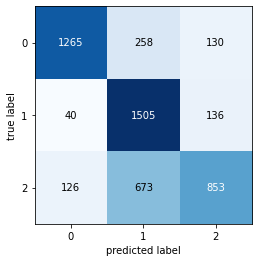

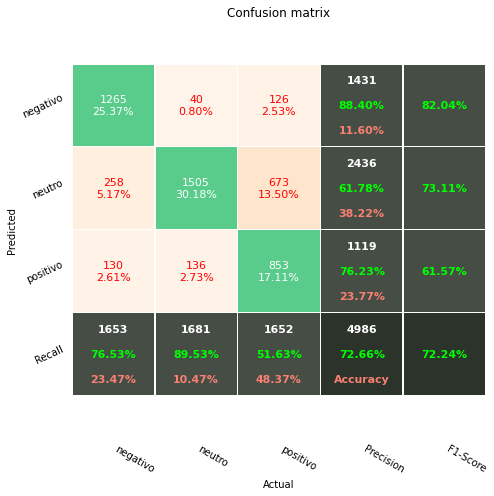

In [54]:
matriz_confusao(y_test, modelo4_pred_orig)

### Validação cruzada - modelo 4

In [55]:
validacao_cruzada4 = cross_val_predict(modelo4_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.69      0.89      0.78      6648
           1       0.71      0.85      0.78      6648
           2       0.85      0.43      0.57      6648

    accuracy                           0.72     19944
   macro avg       0.75      0.72      0.71     19944
weighted avg       0.75      0.72      0.71     19944

Acurácia: 0.7236

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5922   455   271   6648
1         738  5674   236   6648
2        1960  1853  2835   6648
All      8620  7982  3342  19944 


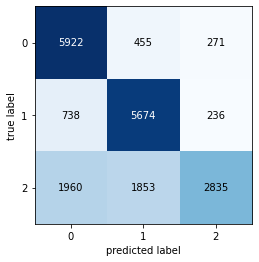

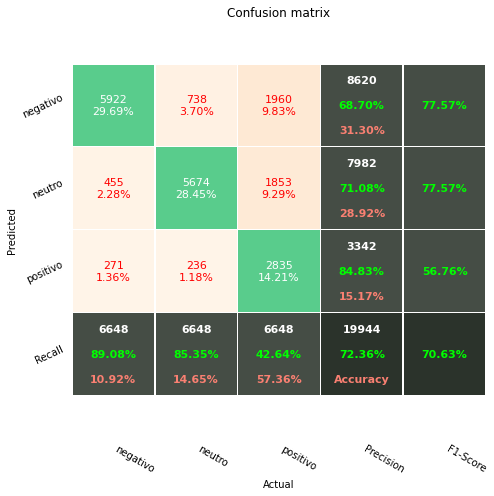

In [56]:
matriz_confusao(y, validacao_cruzada4)

## Modelo 5 (CountVectorizer e PassiveAggressiveClassifier)

In [57]:
modelo5_orig = escolher_pipeline(5)
modelo5_orig = modelo5_orig.fit(X_train, y_train)
modelo5_pred_orig = modelo5_orig.predict(X_test)

In [58]:
modelo5_pred_orig

array([2, 1, 2, ..., 0, 0, 1])

### Avaliando o modelo 5

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1653
           1       0.73      0.83      0.78      1681
           2       0.79      0.67      0.73      1652

    accuracy                           0.78      4986
   macro avg       0.78      0.78      0.77      4986
weighted avg       0.78      0.78      0.77      4986

Acurácia: 0.7766

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1380   158   115  1653
1         123  1388   170  1681
2         204   344  1104  1652
All      1707  1890  1389  4986 


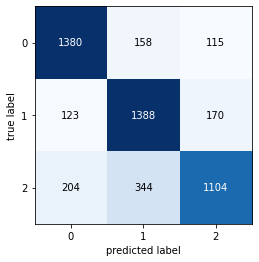

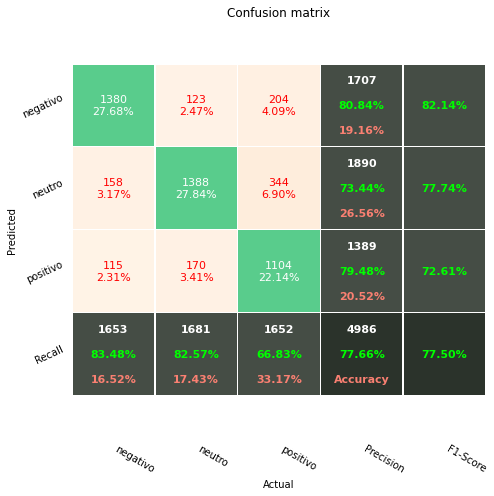

In [59]:
matriz_confusao(y_test, modelo5_pred_orig)

### Validação cruzada - modelo 5

In [60]:
validacao_cruzada5 = cross_val_predict(modelo5_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      6648
           1       0.74      0.83      0.79      6648
           2       0.81      0.69      0.74      6648

    accuracy                           0.79     19944
   macro avg       0.79      0.79      0.79     19944
weighted avg       0.79      0.79      0.79     19944

Acurácia: 0.7881

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5606   613   429   6648
1         458  5540   650   6648
2         784  1293  4571   6648
All      6848  7446  5650  19944 


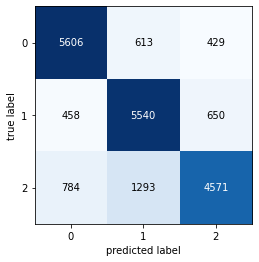

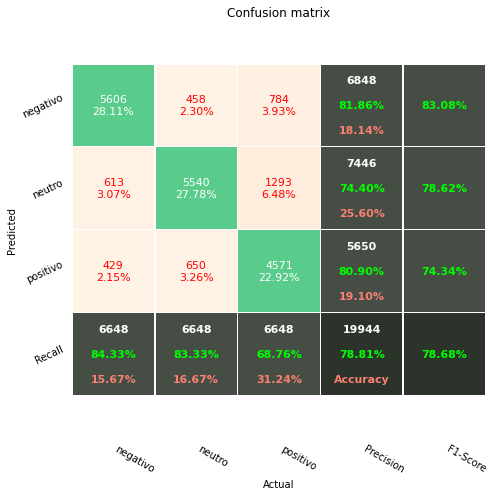

In [61]:
matriz_confusao(y, validacao_cruzada5)

## Modelo 6 (CountVectorizer e GradientBoostingClassifier)

In [62]:
modelo6_orig = escolher_pipeline(6)
modelo6_orig = modelo6_orig.fit(X_train, y_train)
modelo6_pred_orig = modelo6_orig.predict(X_test)

In [63]:
modelo6_pred_orig

array([2, 0, 1, ..., 1, 0, 2])

### Avaliando o modelo 6

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55      1653
           1       0.48      0.72      0.58      1681
           2       0.69      0.48      0.56      1652

    accuracy                           0.57      4986
   macro avg       0.60      0.56      0.56      4986
weighted avg       0.60      0.57      0.56      4986

Acurácia: 0.5656

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0         816   643   194  1653
1         307  1216   158  1681
2         199   665   788  1652
All      1322  2524  1140  4986 


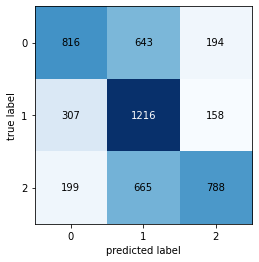

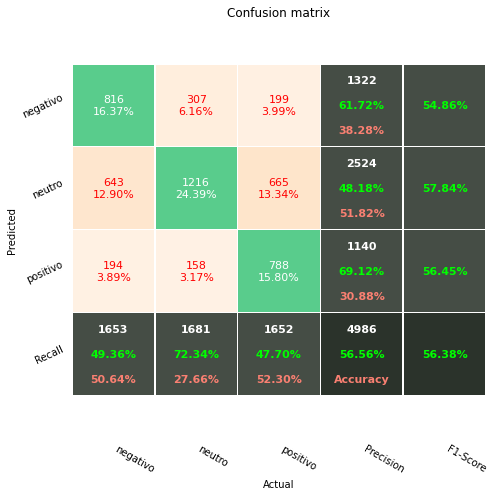

In [64]:
matriz_confusao(y_test, modelo6_pred_orig)

### Validação cruzada - modelo 6

In [65]:
validacao_cruzada6 = cross_val_predict(modelo6_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.62      0.49      0.55      6648
           1       0.46      0.72      0.56      6648
           2       0.68      0.43      0.53      6648

    accuracy                           0.55     19944
   macro avg       0.59      0.55      0.54     19944
weighted avg       0.59      0.55      0.54     19944

Acurácia: 0.5469

Matrix de confusão:
 Predito     0      1     2    All
Real                             
0        3233   2742   673   6648
1        1159   4809   680   6648
2         797   2986  2865   6648
All      5189  10537  4218  19944 


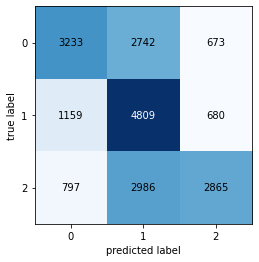

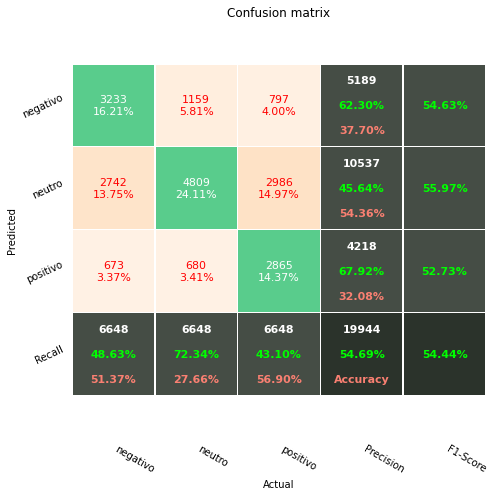

In [66]:
matriz_confusao(y, validacao_cruzada6)

## Modelo 7 (CountVectorizer e XGBClassifier)

In [67]:
modelo7_orig = escolher_pipeline(7)
modelo7_orig = modelo7_orig.fit(X_train, y_train)
modelo7_pred_orig = modelo7_orig.predict(X_test)

In [68]:
modelo7_pred_orig

array([2, 0, 2, ..., 1, 0, 2])

### Avaliando o modelo 7

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68      1653
           1       0.57      0.78      0.66      1681
           2       0.77      0.58      0.66      1652

    accuracy                           0.66      4986
   macro avg       0.69      0.66      0.67      4986
weighted avg       0.69      0.66      0.67      4986

Acurácia: 0.6645

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1057   455   141  1653
1         226  1304   151  1681
2         164   536   952  1652
All      1447  2295  1244  4986 


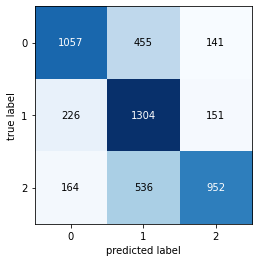

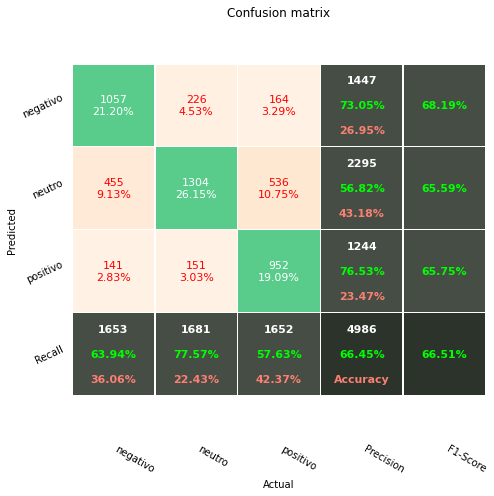

In [69]:
matriz_confusao(y_test, modelo7_pred_orig)

### Validação cruzada - modelo 7

In [70]:
validacao_cruzada7 = cross_val_predict(modelo7_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.64      0.69      6648
           1       0.57      0.78      0.66      6648
           2       0.77      0.58      0.66      6648

    accuracy                           0.67     19944
   macro avg       0.69      0.67      0.67     19944
weighted avg       0.69      0.67      0.67     19944

Acurácia: 0.6686

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        4262  1850   536   6648
1         834  5196   618   6648
2         670  2101  3877   6648
All      5766  9147  5031  19944 


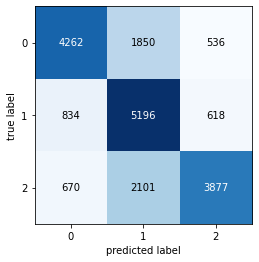

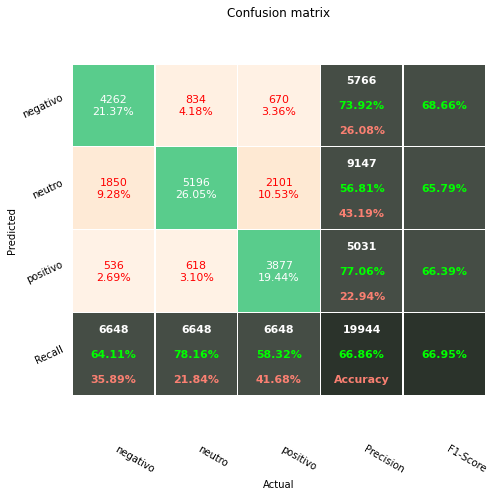

In [71]:
matriz_confusao(y, validacao_cruzada7)

## Modelo 8 (CountVectorizer e MLPClassifier)

In [72]:
modelo8_orig = escolher_pipeline(8)
modelo8_orig = modelo8_orig.fit(X_train, y_train)
modelo8_pred_orig = modelo8_orig.predict(X_test)

In [73]:
modelo8_pred_orig

array([1, 1, 1, ..., 1, 0, 1])

### Avaliando o modelo 8

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      1653
           1       0.72      0.87      0.79      1681
           2       0.83      0.63      0.72      1652

    accuracy                           0.79      4986
   macro avg       0.79      0.79      0.78      4986
weighted avg       0.79      0.79      0.78      4986

Acurácia: 0.7862

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1409   152    92  1653
1         100  1463   118  1681
2         192   412  1048  1652
All      1701  2027  1258  4986 


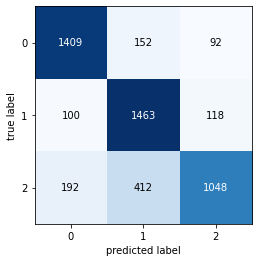

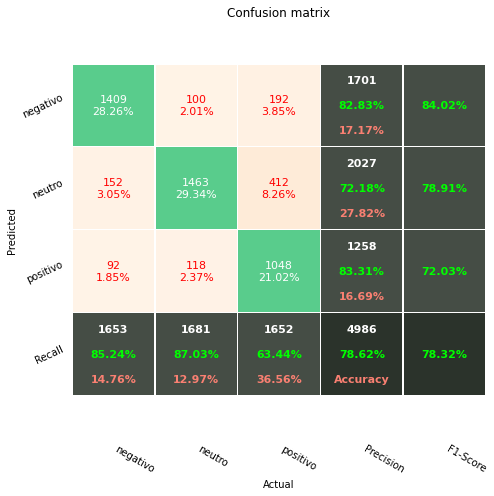

In [74]:
matriz_confusao(y_test, modelo8_pred_orig)

### Validação cruzada - modelo 8

In [75]:
validacao_cruzada8 = cross_val_predict(modelo8_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      6648
           1       0.78      0.87      0.83      6648
           2       0.84      0.72      0.78      6648

    accuracy                           0.82     19944
   macro avg       0.83      0.82      0.82     19944
weighted avg       0.83      0.82      0.82     19944

Acurácia: 0.8248

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5835   432   381   6648
1         314  5799   535   6648
2         665  1168  4815   6648
All      6814  7399  5731  19944 


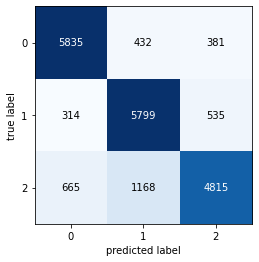

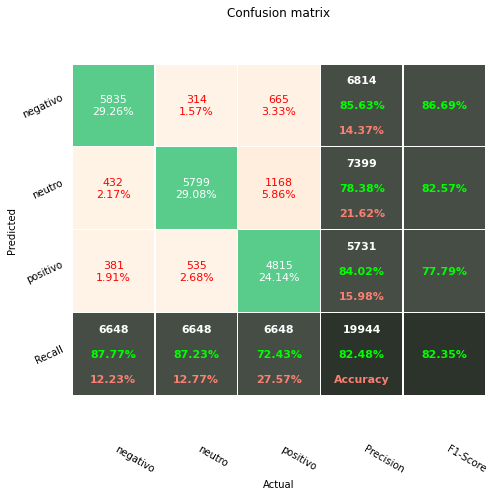

In [76]:
matriz_confusao(y, validacao_cruzada8)

## Modelo 9 (CountVectorizer e LogisticRegression)

In [77]:
modelo9_orig = escolher_pipeline(9)
modelo9_orig = modelo9_orig.fit(X_train, y_train)
modelo9_pred_orig = modelo9_orig.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [78]:
modelo9_pred_orig

array([2, 1, 0, ..., 0, 0, 1])

### Avaliando o modelo 9

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      1653
           1       0.74      0.83      0.78      1681
           2       0.81      0.67      0.73      1652

    accuracy                           0.78      4986
   macro avg       0.78      0.78      0.78      4986
weighted avg       0.78      0.78      0.78      4986

Acurácia: 0.7794

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1394   160    99  1653
1         130  1388   163  1681
2         209   339  1104  1652
All      1733  1887  1366  4986 


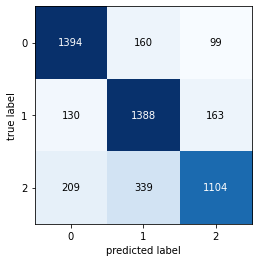

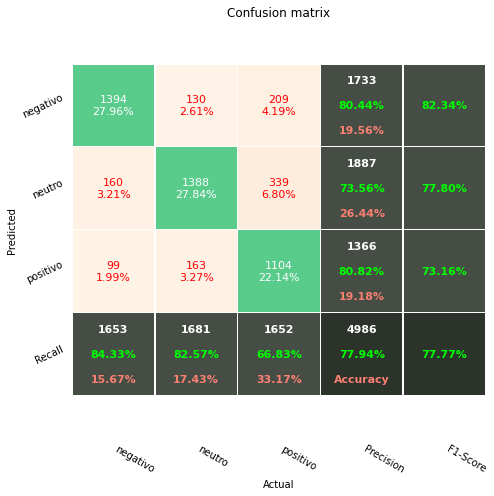

In [79]:
matriz_confusao(y_test, modelo9_pred_orig)

### Validação cruzada - modelo 9

In [80]:
validacao_cruzada9 = cross_val_predict(modelo9_orig, X, y, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84      6648
           1       0.75      0.84      0.79      6648
           2       0.82      0.69      0.75      6648

    accuracy                           0.80     19944
   macro avg       0.80      0.80      0.79     19944
weighted avg       0.80      0.80      0.79     19944

Acurácia: 0.7958

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5680   563   405   6648
1         440  5605   603   6648
2         759  1302  4587   6648
All      6879  7470  5595  19944 


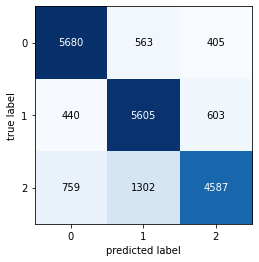

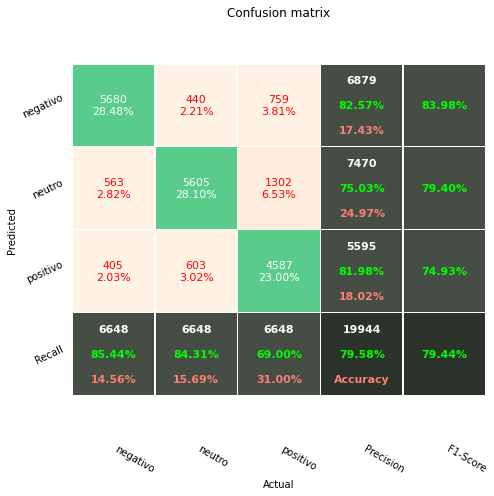

In [81]:
matriz_confusao(y, validacao_cruzada9)

## Modelo 10 (CountVectorizer e SVC)

In [82]:
modelo10_orig = escolher_pipeline(10)
modelo10_orig = modelo10_orig.fit(X_train, y_train)
modelo10_pred_orig = modelo10_orig.predict(X_test)

In [83]:
modelo10_pred_orig

array([1, 1, 2, ..., 2, 0, 2])

### Avaliando o modelo 10

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.72      0.82      1653
           1       0.91      0.77      0.84      1681
           2       0.65      0.93      0.77      1652

    accuracy                           0.80      4986
   macro avg       0.85      0.80      0.81      4986
weighted avg       0.85      0.80      0.81      4986

Acurácia: 0.8041

Matrix de confusão:
 Predito     0     1     2   All
Real                           
0        1184    21   448  1653
1          15  1291   375  1681
2          19    99  1534  1652
All      1218  1411  2357  4986 


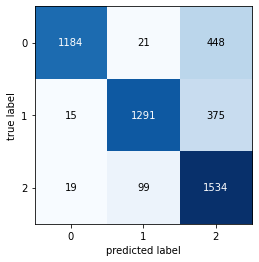

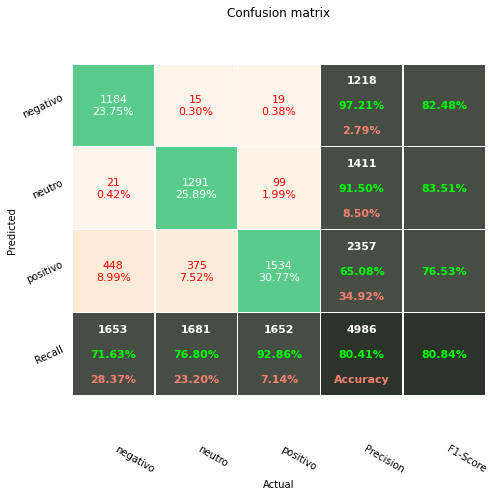

In [84]:
matriz_confusao(y_test, modelo10_pred_orig)

### Validação cruzada - modelo 10

In [85]:
validacao_cruzada10 = cross_val_predict(modelo10_orig, X, y, cv=10)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      0.75      0.85      6648
           1       0.93      0.81      0.87      6648
           2       0.69      0.94      0.80      6648

    accuracy                           0.84     19944
   macro avg       0.87      0.84      0.84     19944
weighted avg       0.87      0.84      0.84     19944

Acurácia: 0.8367

Matrix de confusão:
 Predito     0     1     2    All
Real                            
0        5018    74  1556   6648
1          38  5415  1195   6648
2          56   338  6254   6648
All      5112  5827  9005  19944 


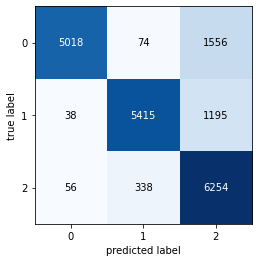

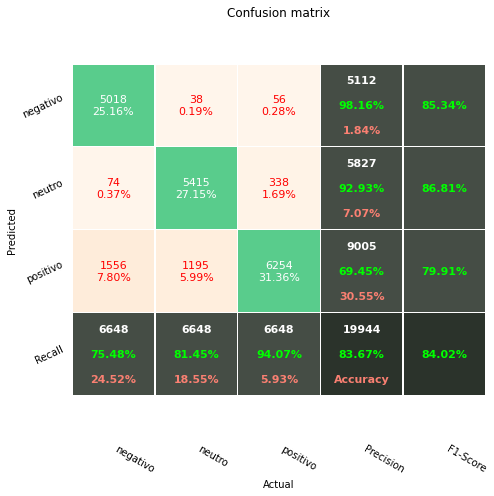

In [86]:
matriz_confusao(y, validacao_cruzada10)

## Gerando relatório dos modelos

In [87]:
# pegando o relatório de metricas dos modelos
report1 = metrics.classification_report(y_test, modelo1_pred_orig, output_dict=True)
report2 = metrics.classification_report(y_test, modelo2_pred_orig, output_dict=True)
report3 = metrics.classification_report(y_test, modelo3_pred_orig, output_dict=True)
report4 = metrics.classification_report(y_test, modelo4_pred_orig, output_dict=True)
report5 = metrics.classification_report(y_test, modelo5_pred_orig, output_dict=True)
report6 = metrics.classification_report(y_test, modelo6_pred_orig, output_dict=True)
report7 = metrics.classification_report(y_test, modelo7_pred_orig, output_dict=True)
report8 = metrics.classification_report(y_test, modelo8_pred_orig, output_dict=True)
report9 = metrics.classification_report(y_test, modelo9_pred_orig, output_dict=True)
report10 = metrics.classification_report(y_test, modelo10_pred_orig, output_dict=True)

In [88]:
# criando o dataframe para o relatório consolidado
columns = ['modelo', 'prec_neg', 'prec_neu', 'prec_pos', 'rec_neg', 'rec_neu', 'rec_pos', 'f1_neg', 'f1_neu', 'f1_pos', 'accuracy']
report_df = pd.DataFrame(columns=columns)

In [89]:
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,accuracy


In [90]:
# criando a lista com o modelos de classificação
modelos = ['SGD_Count',
            'MultinomialNB_Count',
            'RandomForest_Count',
            'KNeighbors_Count',
            'PassiveAggressive_Count',
            'GradientBoosting_Count',
            'XGB_Count',
            'MLP_Count',
            'LogisticRegression_Count',
            'SVC_Count']

In [91]:
# criando a lista com os relatórios individuais
reports = [report1, 
            report2,
            report3,
            report4,
            report5,
            report6,
            report7,
            report8,
            report9,
            report10]

In [92]:
# loop para criação do relátorio consolidado
for i in range(len(modelos)):
    report_df.loc[i] = [modelos[i], 
                    round(reports[i]['0']['precision'], 2), 
                    round(reports[i]['1']['precision'], 2),
                    round(reports[i]['2']['precision'], 2),
                    round(reports[i]['0']['recall'], 2),
                    round(reports[i]['1']['recall'], 2),
                    round(reports[i]['2']['recall'], 2),
                    round(reports[i]['0']['f1-score'], 2),
                    round(reports[i]['1']['f1-score'], 2),
                    round(reports[i]['2']['f1-score'], 2),
                    round(reports[i]['accuracy'], 2)] 

In [93]:
report_df.sort_values(by='accuracy', ascending=False, inplace=True)
report_df

,modelo,prec_neg,prec_neu,prec_pos,rec_neg,rec_neu,rec_pos,f1_neg,f1_neu,f1_pos,accuracy
9,SVC_Count,0.97,0.91,0.65,0.72,0.77,0.93,0.82,0.84,0.77,0.80
2,RandomForest_Count,0.82,0.75,0.82,0.86,0.86,0.66,0.84,0.80,0.73,0.79
7,MLP_Count,0.83,0.72,0.83,0.85,0.87,0.63,0.84,0.79,0.72,0.79
0,SGD_Count,0.81,0.74,0.79,0.83,0.81,0.69,0.82,0.77,0.73,0.78
4,PassiveAggressive_Count,0.81,0.73,0.79,0.83,0.83,0.67,0.82,0.78,0.73,0.78
8,LogisticRegression_Count,0.80,0.74,0.81,0.84,0.83,0.67,0.82,0.78,0.73,0.78
3,KNeighbors_Count,0.88,0.62,0.76,0.77,0.90,0.52,0.82,0.73,0.62,0.73
1,MultinomialNB_Count,0.72,0.72,0.72,0.81,0.66,0.70,0.76,0.69,0.71,0.72
6,XGB_Count,0.73,0.57,0.77,0.64,0.78,0.58,0.68,0.66,0.66,0.66
5,GradientBoosting_Count,0.62,0.48,0.69,0.49,0.72,0.48,0.55,0.58,0.56,0.57


In [94]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
# salvando o relatório consolidado em excel
report_df.to_excel("repost_over_count.xlsx")